# Analysing k-means: estimating the numbers of clusters
The number of clusters (k) is an important parameter for KMeans clustering. If k is too small, the clusters will be too large and will not accurately capture the underlying structure of the data. If k is too large, the clusters will be too small and will not be meaningful.

The inertia elbow method and the silhouette score are two popular methods for estimating the optimal number of clusters for KMeans. In this notebook, we will learn how to use both of these methods.

---
## 1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Get the spreadsheet ID and name
sheet_id = "1gYXqOBLEYIr99YmKGq2nIvK3CJmoWzsvwfwR9adfo2w"
sheet_name = "18136796"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `student` and only read the first 15 rows
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop the `favorite_color` column
foods_df = foods_df.drop(columns="favorite_color")

---
## 2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on the inertia and silhouette scores. However, we encourage you to experiment with other scalers, as they can have a impact.

In [3]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(foods_df)

---
## 3.&nbsp; Estimate the number of clusters (k) 🔢

### 3.1.&nbsp; Inertia and the elbow method

In clustering, inertia is a measure of how well data points fit into their assigned clusters. Lower inertia indicates a better fit. However, minimising inertia alone can lead to meaningless clusters, with each data point in its own cluster.

The elbow method is a visual aid for identifying the optimal number of clusters. It plots inertia values for different cluster numbers, revealing an "elbow" where the inertia reduction begins to plateau. This plateau indicates that reducing inertia further has little impact on cluster quality.

To find the inertia score for our clusters, we can use the [KMeans attribute ](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)`.inertia_`.

We will cluster our food preferences data multiple times, starting with 1 cluster and increasing the number of clusters by 1 each time until we reach `max_k`. We will store the inertia score for each clustering in a list.

Once we've calculated the inertia scores for all values of k, we'll plot them on a line chart. We'll then look for the "elbow" in the line chart. The elbow is the point where the inertia score starts to plateau, indicating that adding more clusters is not significantly improving the quality of the clustering.

In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 12

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_features_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

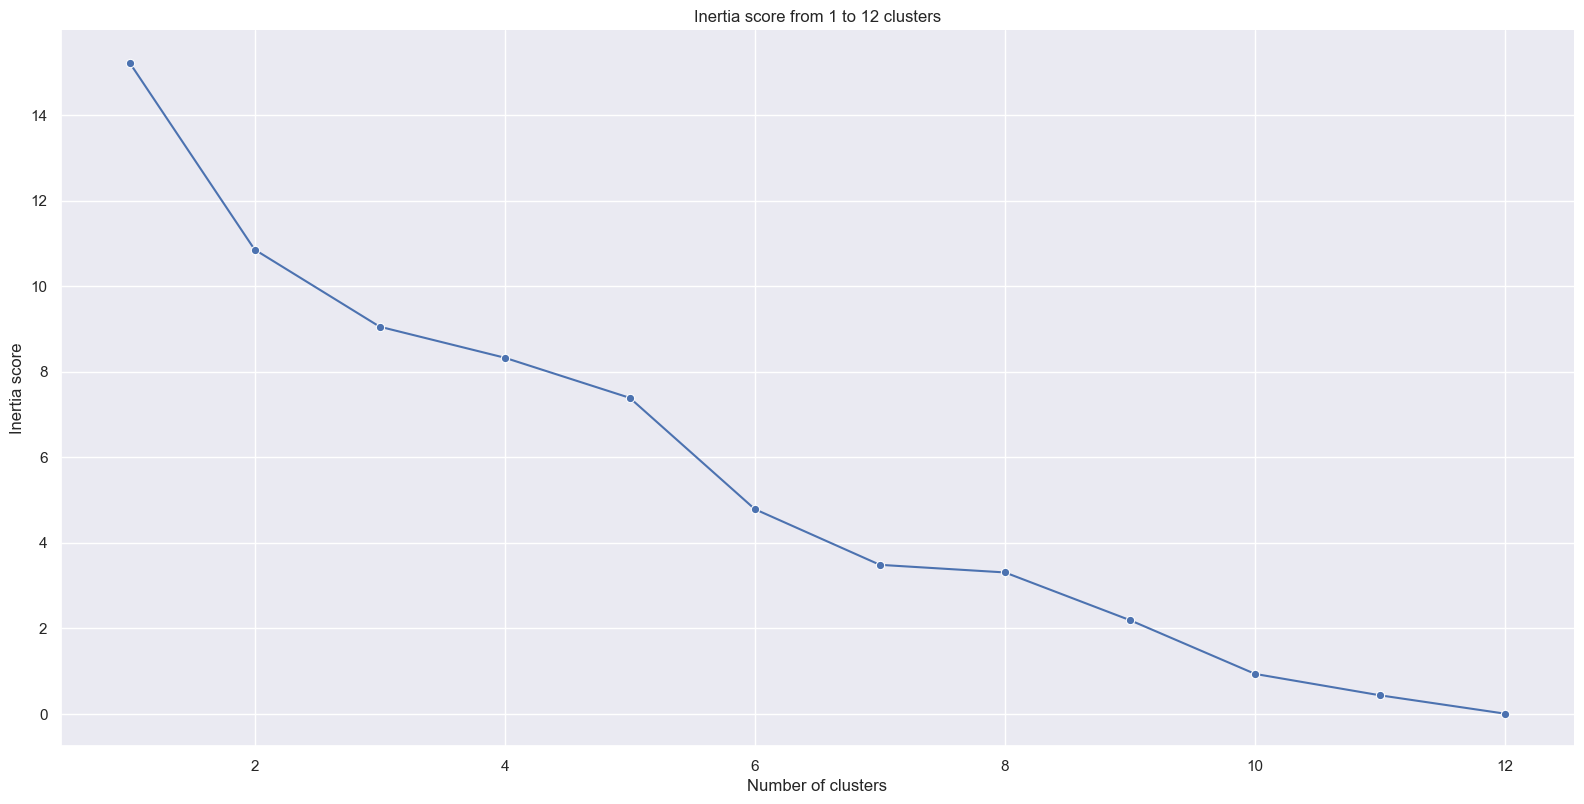

In [5]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

Where the elbow lies is not always clear - it's up to you to decide, you're the data scientist. If there are multiple points where you believe the elbow could be, use your knowledge of the business case to inform your decision. How many data points do you have? How many would be in a cluster if you chose this number of clusters? What is the point of making these clusters? Is there a logical number of clusters, where if you make more clusters they just become too small for your business case?
> The elbow method is a heuristic, meaning that it is not guaranteed to find the optimal number of clusters in all cases.

### 3.2.&nbsp; The silhouette score
The silhouette score is another metric for evaluating the quality of clustering results. It measures how well each data point is assigned to its cluster, taking into account the distance to other clusters. The silhouette score ranges from -1 to 1, with higher scores indicating better clustering.

The silhouette score can be used to identify the optimal number of clusters by clustering the data with different numbers of clusters and selecting the number of clusters that has the highest the silhouette score.

To calculate the silhouette score we'll use the [SKLearn function ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)`silhouette_score`.

In [ ]:
# Set the maximum number of clusters to try
max_k = 12

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_features_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(scaled_features_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

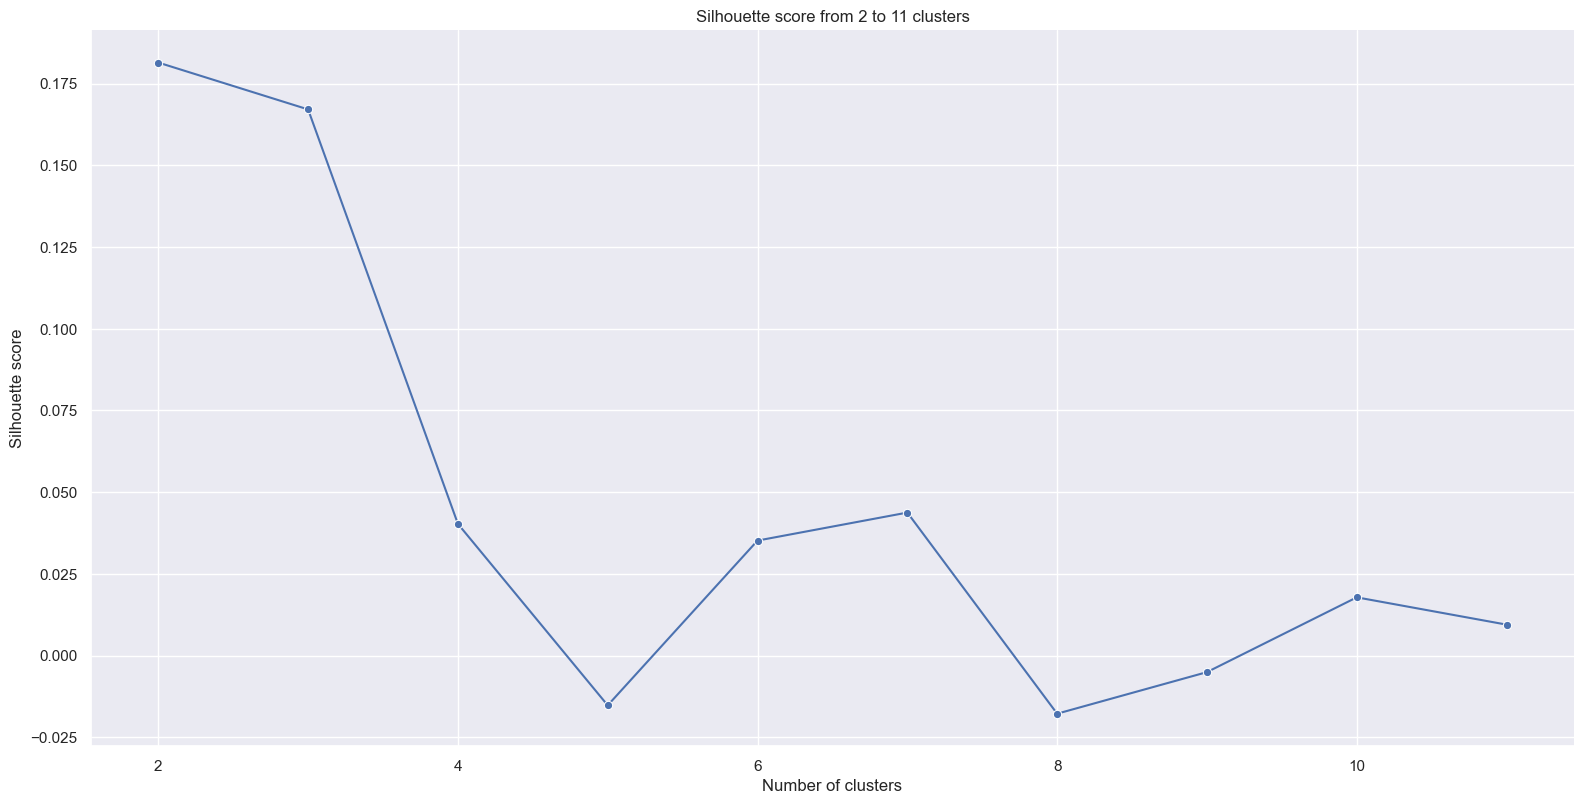

In [7]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

To determine the optimal number of clusters, we can look for the highest silhouette score. This score measures how well each point is assigned to its cluster, with higher scores indicating better clustering.

However, the highest silhouette score may not always be the best choice. For example, if the score is very high for a large number of clusters, it may be a sign that the clusters are too finely grained and that we are overfitting the data.

In addition, we should consider our business objectives and the data we are using. For example, if we are clustering customers based on their purchase history, we may want to choose a smaller number of clusters so that we can easily identify different customer segments.

Therefore, it's important to use the silhouette score in conjunction with other methods, such as the elbow method, and to consider our business objectives and the data we are using when choosing the optimal number of clusters.
> You can also experiment with different values for random_state. It's possible that you got a "bad seed" and this is leading to misleading results. Make sure to use the same random_state for both the inertia and silhouette methods so that you are comparing the same clusters.

---
## 4.&nbsp; Explore the cluster means 🗺️

#### 4.1.&nbsp; Column averages
By grouping the clusters and looking at the average score for each column, you can learn more about the different groups of students and their food preferences. For example, you might find that one group of students prefers healthy foods like broccoli and peas, while another group prefers more processed foods like hamburgers. You might also find that some groups of students have a more diverse range of food preferences than others.

In [8]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 5, # you always choose the number of k here
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
scaled_features_df.groupby(by="cluster").mean()

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
cluster,,,,,,,,,,
0,0.714286,0.00,0.500000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.187500
1,0.000000,1.00,0.700000,0.800000,0.800000,1.000000,0.666667,1.000000,0.900000,0.250000
2,0.785714,0.80,0.900000,0.000000,0.150000,0.800000,1.000000,0.850000,0.650000,0.671875
3,0.642857,0.50,0.233333,0.266667,0.583333,0.566667,0.555556,0.416667,0.266667,0.138021
4,0.142857,0.15,0.900000,0.700000,0.750000,0.300000,0.833333,0.750000,0.750000,0.351562


#### 4.2.&nbsp; Radar chart
Having calculated the average score for each food by cluster, we now have a matrix that we can analyse. However, as data scientists with coding skills, we can visualise this information to gain a clearer understanding of why certain people are clustered together and why others aren't.

Visualising the data can help us to identify patterns and trends that would be difficult to see in a matrix. For example, we might be able to see that certain foods are consistently grouped together, while others are more spread out. This could suggest that there are different subgroups of students with different dietary preferences.

We can also use visualisation to identify outliers. For example, we might find a few students who have very different food preferences than the rest of the group. This could be due to a variety of factors, such as cultural background, medical conditions, or personal preferences.

In [10]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = scaled_features_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[0]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[1]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[2]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[3]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[4]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[5]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[6]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[7]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[8]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[9]].mean()]
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean food preferences by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

---
# 5.&nbsp; Challenge: apply this to the spotify dataset 😃
Now that you have learned how to estimate the optimal number of clusters, it's time to apply this knowledge to the Spotify data. Determine the number of clusters that you think is correct, apply it to the data, and evaluate the resulting clusters.

To evaluate the clusters, consider the business context. We want the clusters to be coherent playlists that customers will be happy with. For example, would most customers be happy with a couple of death metal tracks interrupting their classical playlist? Or would customers be happy with "Clair de lune" in the middle of a high-energy workout playlist? Listen to the tracks, look at the names, and get a feel for what's happening.

Also, feel free to be creative in how you think you can decide whether the tracks in each cluster go together or not.

## 5.1 Data with scaling

Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly
import plotly.graph_objects as go
import random
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

from ydata_profiling import ProfileReport

Data

In [23]:
file_id = "12RcGLcvv-UjJjb3wL_yL76EiPT2JvB3k" # milos
url = f'https://drive.google.com/uc?export=download&id={file_id}'
songs5000_df = pd.read_csv(url, index_col='id                     ')
songs5000_df.columns = songs5000_df.columns.str.strip()
songs5000_df = songs5000_df[~songs5000_df.index.duplicated(keep='first')]
songs5000_names_df = songs5000_df[['name', 'artist', 'html']]
to_drop = ['Unnamed: 0', 'name', 'artist', 'html', 'type'] # 'duration_ms'?? # Sudeep took out also: key, mode, time_signature
songs5000_df = songs5000_df.drop(columns=to_drop)
songs5000_df = songs5000_df.drop_duplicates(keep='first')

Scalers and transformers

In [24]:
preprocessing_dict = {'danceability': ['no preprocessing'],
           'energy': ['quantile'],
           'key': ['minmax'],
           'loudness': ['robust','power', 'minmax'],
           'mode': ['no'],
           'speechiness': ['robust', 'power', 'minmax'],
           'acousticness': ['quantile'],
           'instrumentalness': ['power', 'minmax'],
           'liveness': ['power', 'minmax'],
           'valence': ['power', 'minmax'],
           'tempo': ['standard', 'minmax'],
           'duration_ms': ['robust'],
           'time_signature': ['power']}
preprocessing_df = pd.DataFrame([(key, feature) for key, features in preprocessing_dict.items() for feature in features], columns=["feature", "method"])
preprocessing_df

,feature,method
0,danceability,no preprocessing
1,energy,quantile
2,key,minmax
3,loudness,robust
4,loudness,power
5,loudness,minmax
6,mode,no
7,speechiness,robust
8,speechiness,power
9,speechiness,minmax


In [25]:
songs5000_preprocessed_df = songs5000_df.copy()

for i, row in preprocessing_df.iterrows():
    if row['method'] == 'minmax':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (MinMaxScaler().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'standard':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (StandardScaler().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'robust':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (RobustScaler().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'quantile':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (QuantileTransformer().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'power':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (PowerTransformer().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))

In [26]:
# # outdated by previous cell
# preprocessing = {'no': ['danceability', 'mode', 'valence'],
#            'standard': ['tempo'],
#            'minmax': ['key', 'tempo'],
#            'quantile': ['acousticness'],
#            'power': ['loudness', 'speechiness', 'time_signature', 'liveness', 'instrumentalness', 'valence']}
# scaler_standard_df = StandardScaler().set_output(transform="pandas").fit_transform(songs5000_df[preprocessing_dict['standard']])
# scaler_minmax_df = StandardScaler().set_output(transform="pandas").fit_transform(songs5000_df[preprocessing_dict['minmax']])
# transform_quantile_df = QuantileTransformer().set_output(transform="pandas").fit_transform(songs5000_df[preprocessing_dict['quantile']])
# transform_power_df = PowerTransformer().set_output(transform="pandas").fit_transform(songs5000_df[preprocessing_dict['power']])
# songs5000_scaled_df = pd.concat([scaler_standard_df, scaler_minmax_df, transform_quantile_df, transform_power_df], axis=1)

Plot

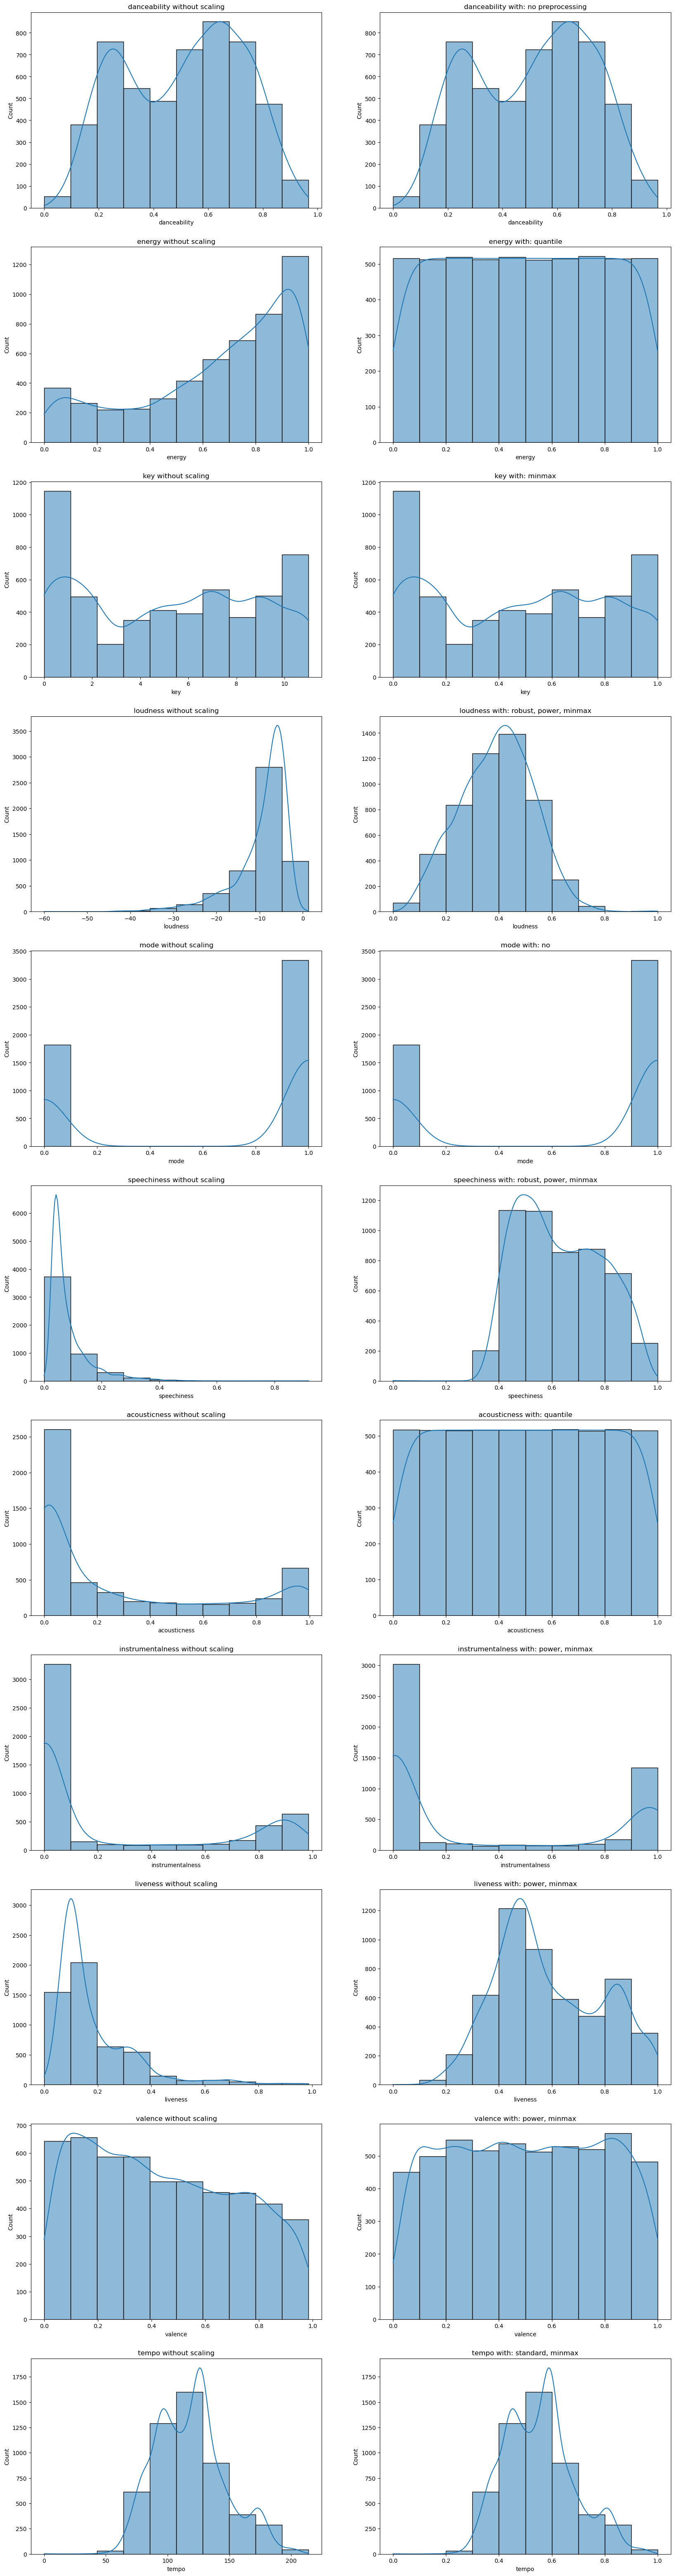

In [27]:
fig, ax = plt.subplots(11, 2, figsize=(20, 80))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_df.iloc[:, i], bins=10, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_preprocessed_df.iloc[:, i], bins=10, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing_dict.keys())[i]} without scaling')
    ax[i, 1].set_title(f'{list(preprocessing_dict.keys())[i]} with: {''', '''.join(preprocessing_dict[list(preprocessing_dict.keys())[i]])}')
    
plt.show()

## 5.2 Finding the right number of clusters

For loop for both inertia and silhouette score

In [28]:
random.seed(123)

In [29]:
# For loop with 10 iterations per each k value

# Parameters
seed = 123
min_k = 5
max_k = 120
iterations_per_seed = 20
inertia_list = []
sil_scores = []

# Generate 10 random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_preprocessed_df)
        
        # Calculate inertia and silhouette score
        inertia_in_iteration.append(k_means.inertia_)
        labels = k_means.labels_
        sil_score = silhouette_score(songs5000_preprocessed_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    inertia_list.append(pd.Series(inertia_in_iteration).mean())
    sil_scores.append(pd.Series(sil_score_in_iteration).mean())


In [30]:
# # For loop with 1 iteration per each k value

# # Parameters
# seed = 123
# min_k = 5
# max_k = 120

# # Create empty list to store the scores
# inertia_list = []
# sil_scores = []

# # Iterations
# for i in range(min_k, max_k):
#     k_means = KMeans(n_clusters = i, n_init = "auto", random_state = seed)
#     k_means.fit(songs5000_preprocessed_df)
    
#     # inertia
#     inertia_list.append(k_means.inertia_)
    
#     # silhouette
#     labels = k_means.labels_
#     score = silhouette_score(songs5000_preprocessed_df, labels)
#     sil_scores.append(score)

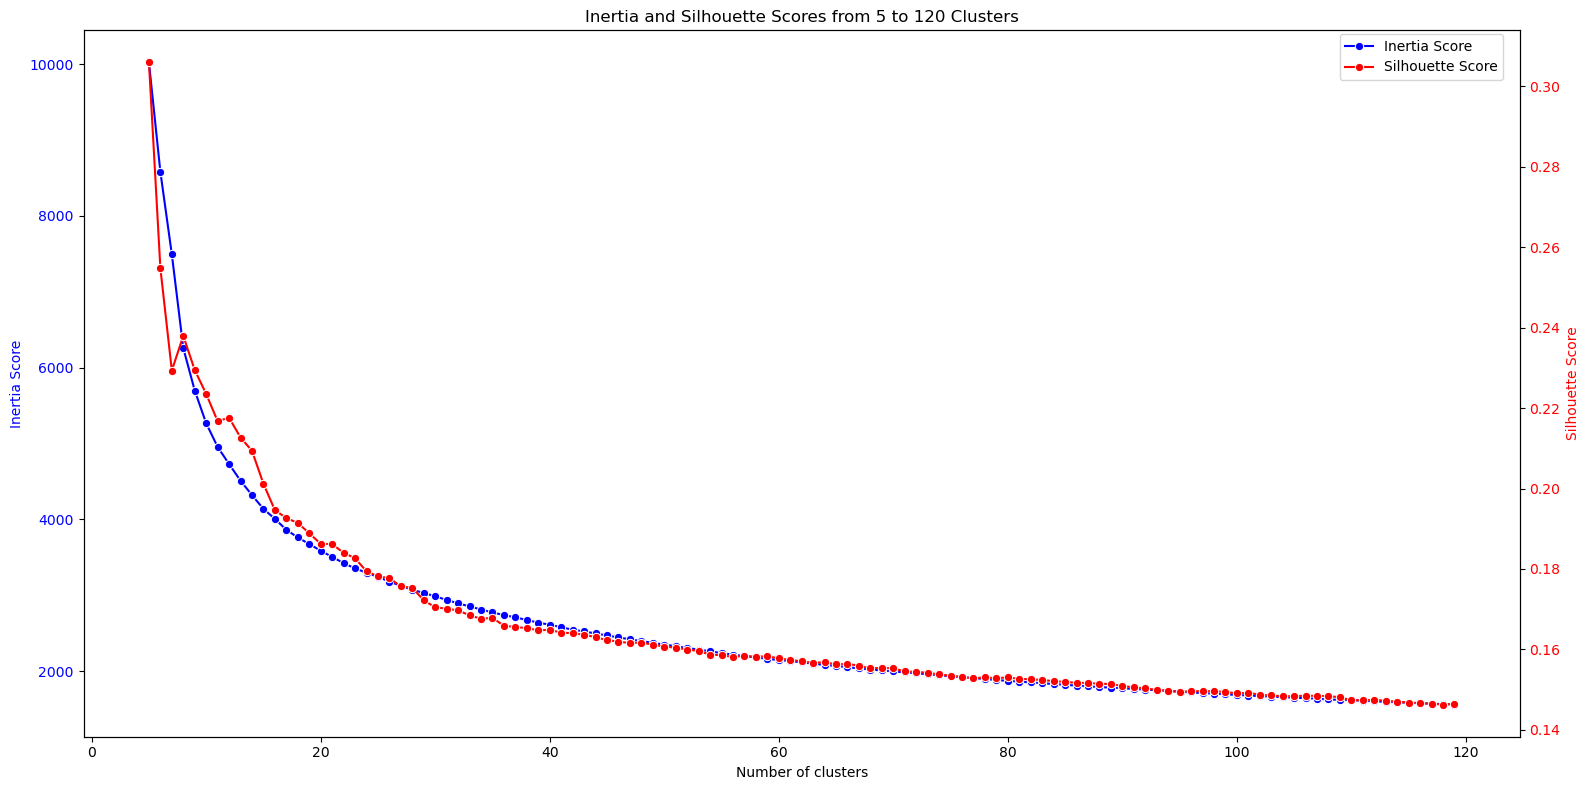

In [37]:
# Assuming inertia_list, sil_scores, min_k, and max_k are defined
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Plot inertia scores
sns.lineplot(x=range(min_k, max_k), y=inertia_list, marker='o', ax=ax, label="Inertia Score", color='b', legend=False)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Score", color='b')
ax.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores, marker='o', ax=ax2, label="Silhouette Score", color='r', legend=False)
ax2.set_ylabel("Silhouette Score", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legends
ax.set_title(f"Inertia and Silhouette Scores from {min_k} to {max_k} Clusters")
fig.legend(loc="upper right", bbox_to_anchor=(0.947, 0.96))

# Show the plot
plt.tight_layout()
plt.show()


maybe 80? or 32? or 23? or 21? or 28? or 35?

## 5.3 Radar chart

In [32]:
my_kmeans = KMeans(n_clusters = 32, random_state = 123)
my_kmeans.fit(songs5000_preprocessed_df)
clusters = my_kmeans.labels_
songs5000_preprocessed_df["cluster"] = clusters

In [33]:
songs5000_preprocessed_df.groupby(by="cluster").mean().mean()

danceability        0.417131
energy              0.397935
key                 0.471424
loudness            0.328272
mode                0.658676
speechiness         0.607667
acousticness        0.589747
instrumentalness    0.502153
liveness            0.578150
valence             0.394763
tempo               0.534146
duration_ms         2.693393
time_signature      0.007404
dtype: float64

In [34]:
# min
scatter_objects = []
categories = songs5000_preprocessed_df.drop(columns=['tempo', 'duration_ms', 'time_signature', 'cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_preprocessed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_preprocessed_df.loc[songs5000_preprocessed_df["cluster"] == cluster, category].min() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of min by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

In [38]:
scatter_objects = []
categories = songs5000_preprocessed_df.drop(columns=['tempo', 'duration_ms', 'time_signature', 'cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_preprocessed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_preprocessed_df.loc[songs5000_preprocessed_df["cluster"] == cluster, category].max() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of max by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

In [36]:
scatter_objects = []
categories = songs5000_preprocessed_df.drop(columns=['tempo', 'duration_ms', 'time_signature', 'cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_preprocessed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_preprocessed_df.loc[songs5000_preprocessed_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()